In [1]:
#pragma cling load("libopencv_highgui")
#pragma cling load("libopencv_core")
#pragma cling load("libopencv_imgproc")
#include "opencv2/highgui/highgui.hpp"
#include "opencv2/core/core.hpp"
#include "opencv2/imgproc/imgproc.hpp"
#include "xtl/xbase64.hpp"
#include <iostream>
#include <string>
using namespace cv;

In [2]:
// Shim for displaying opencv mats in jupyter.
// If you're just interested in getting started using opencv in a jupyter notebook,
// just copy/paste this into your notebook.
void DisplayCV(const Mat& m) {
    // Displaying works by producing a base 64 encoded PNG, which the browser knows how to display.
    
    // Convert the image into PNG bytes using cv::imencode.
    // Here is a buffer to store the PNG bytes.
    std::vector<uchar> encoded_data_char;
    // Do the conversion.
    cv::imencode(".png", m, encoded_data_char);
    
    // base-64 encode the PNG bytes and send them to the browser.
    // xtl wants a string, but we have a std::vector<uchar>.
    std::string encoded_data(encoded_data_char.begin(), encoded_data_char.end());
        
    // The rest uses the xeus-provided plumbing to ship the base-64-encoded bytes to the browser.
    xeus::xjson mime;
    mime["image/png"] = xtl::base64encode(encoded_data);
    xeus::get_interpreter().display_data(std::move(mime), xeus::xjson::object(), xeus::xjson::object());
}

In [3]:
// I like to put declarations in their own cell. The reason is that re-running a cell with declarations will produce a 
// double-define error.
Mat flower, flower_hsv, flower_desat;

In [4]:
// Load the image
flower = imread("flower.jpg");
// Print the size to ensure it loaded correctly.
std::cout << flower.rows << "x" << flower.cols << std::endl;

273x512


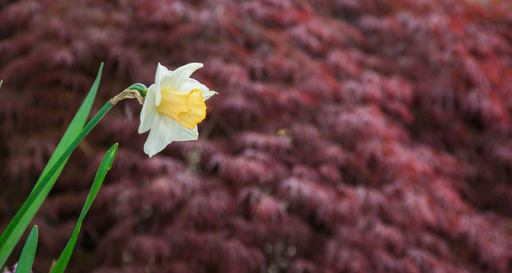

In [5]:
DisplayCV(flower)

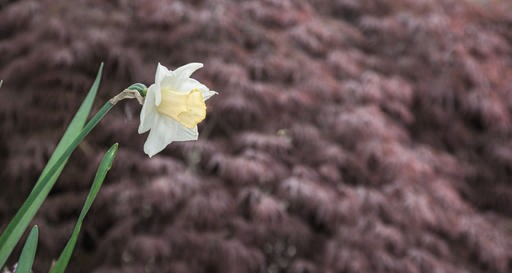

In [6]:
// Perform the desaturation.

// First, convert from the BGR colorspace to HSV.
cvtColor(flower, flower_hsv, COLOR_BGR2HSV);

// This is a nice way to iterate over a 3-channel matrix.
// "Vec3b" is shorthand for "vector of 3 bytes" (i.e., 3 unsigned 8-bit integers)
for(auto& pixel : Mat_<Vec3b>(flower_hsv)) {
    pixel[1] = pixel[1]/2;
}

// Convert back to BGR and display.
cvtColor(flower_hsv, flower_desat, COLOR_HSV2BGR);

DisplayCV(flower_desat);

# Small inline matrices

In this example, I will warp the image using a simple perspective transform. The transform will be specified by a small, inline matrix. The main point here is to show a convenient way to specify such small matrices in-line, which I have found very helpful.

In [7]:
// Again, keeping the declarations in their own cell is helpful for quicker iterating.

// This will be the 3x3 matrix mentioned above.
Mat transform_matrix;

// flower_reflected will be our output to store the rotated flower.
Mat flower_reflected;

In [8]:
// This is a 3x3 transform matrix, in homogeneous coordinates.
// The upper left 2x2 matrix says "switch x with y".
// The other parameters are related to translation and scaling, here set to 0 and 1.
// So, this transform reflects the image across the main diagonal.
transform_matrix = (Mat_<double>(3,3) << 
                    0,1,0,
                    1,0,0,
                    0,0,1);

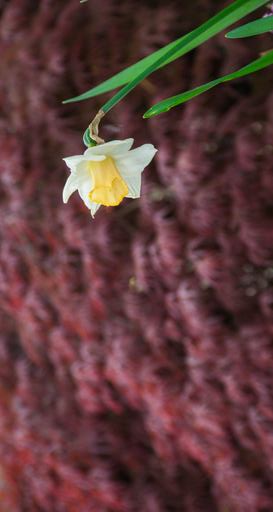

In [9]:
// Perform the transform using a built-in warp function
warpPerspective(flower, flower_reflected, transform_matrix, {273,512});

// Display.
DisplayCV(flower_reflected);